In [2]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from train import train
from evaluate import load_model_inference, evaluate, build_search_index, get_recommendations
from utils import build_all_vocabs
from sklearn.model_selection import train_test_split
from model import DualEncoder

torch.manual_seed(189)

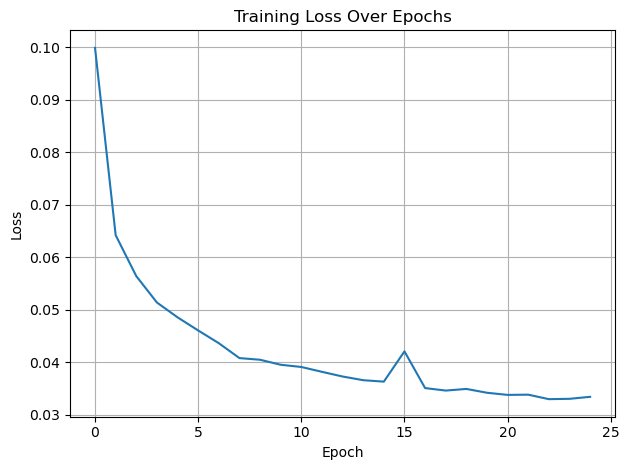

In [2]:
loss_info = pd.read_csv("/home/gort/Projects/coffee-rating/data/outputs/loss-info/loss_info_8_11.csv")
plt.plot(np.arange(25), loss_info["loss"])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.tight_layout()
plt.grid()
plt.show();

In [3]:
# compute test score for each epoch
test_data_path = "/home/gort/Projects/coffee-rating/data/processed/test_data_8_11.csv"
train_data_path = "/home/gort/Projects/coffee-rating/data/processed/training_data.jsonl"
model_paths = [f"/home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_{epoch+1}.pth" for epoch in range(25)]

test_data = pd.read_csv(test_data_path)

# first compute for baseline
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = torch.load(model_paths[0], map_location=device)
vocabs = checkpoint["vocabs"]
model = DualEncoder(vocabs, numerical_dim=10).to(device)
model.eval()

evaluation_results = []
test_score = evaluate(model, test_data, vocabs, train_data_path, device)
evaluation_results.append(test_score)

for model_path in model_paths:
    model, _= load_model_inference(model_path, 10, device)
    test_score = evaluate(model, test_data, vocabs, train_data_path, device)
    evaluation_results.append(test_score)

/tmp/ipykernel_104314/836186026.py:10: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_paths[0], map_location=device)



Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 92.10it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:45<00:00, 218.22it/s]
/home/gort/Projects/coffee-rating/src/models/evaluate.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feat

Total Test Queries: 9828
Recall@1:  0.0011
Recall@5:  0.0070
Recall@10: 0.0135
NDCG@10:  0.5439
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_1.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.73it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 212.59it/s]


Total Test Queries: 9828
Recall@1:  0.0179
Recall@5:  0.0769
Recall@10: 0.1337
NDCG@10:  0.7077
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_2.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.71it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 213.08it/s]


Total Test Queries: 9828
Recall@1:  0.0207
Recall@5:  0.0755
Recall@10: 0.1319
NDCG@10:  0.6806
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_3.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.34it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 212.64it/s]


Total Test Queries: 9828
Recall@1:  0.0236
Recall@5:  0.0915
Recall@10: 0.1490
NDCG@10:  0.7037
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_4.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.52it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 212.95it/s]


Total Test Queries: 9828
Recall@1:  0.0265
Recall@5:  0.0975
Recall@10: 0.1663
NDCG@10:  0.6935
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_5.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.52it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 213.11it/s]


Total Test Queries: 9828
Recall@1:  0.0296
Recall@5:  0.1033
Recall@10: 0.1705
NDCG@10:  0.6993
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_6.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.77it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 212.61it/s]


Total Test Queries: 9828
Recall@1:  0.0297
Recall@5:  0.1010
Recall@10: 0.1710
NDCG@10:  0.6815
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_7.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.53it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 213.46it/s]


Total Test Queries: 9828
Recall@1:  0.0322
Recall@5:  0.1101
Recall@10: 0.1846
NDCG@10:  0.6886
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_8.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.47it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:45<00:00, 215.12it/s]


Total Test Queries: 9828
Recall@1:  0.0297
Recall@5:  0.1050
Recall@10: 0.1742
NDCG@10:  0.6775
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_9.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 92.13it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:45<00:00, 215.76it/s]


Total Test Queries: 9828
Recall@1:  0.0342
Recall@5:  0.1127
Recall@10: 0.1835
NDCG@10:  0.6984
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_10.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:05<00:00, 94.88it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:44<00:00, 220.16it/s]


Total Test Queries: 9828
Recall@1:  0.0286
Recall@5:  0.0991
Recall@10: 0.1635
NDCG@10:  0.6736
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_11.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 93.86it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:44<00:00, 220.69it/s]


Total Test Queries: 9828
Recall@1:  0.0354
Recall@5:  0.1204
Recall@10: 0.1929
NDCG@10:  0.7117
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_12.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 93.97it/s] 


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:44<00:00, 221.90it/s]


Total Test Queries: 9828
Recall@1:  0.0343
Recall@5:  0.1138
Recall@10: 0.1805
NDCG@10:  0.6957
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_13.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:05<00:00, 94.18it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:45<00:00, 217.64it/s]


Total Test Queries: 9828
Recall@1:  0.0376
Recall@5:  0.1217
Recall@10: 0.1970
NDCG@10:  0.6990
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_14.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 93.05it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:44<00:00, 218.94it/s]


Total Test Queries: 9828
Recall@1:  0.0351
Recall@5:  0.1152
Recall@10: 0.1902
NDCG@10:  0.6651
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_15.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:05<00:00, 95.29it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:45<00:00, 217.24it/s]


Total Test Queries: 9828
Recall@1:  0.0359
Recall@5:  0.1180
Recall@10: 0.1852
NDCG@10:  0.6767
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_16.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.35it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 209.24it/s]


Total Test Queries: 9828
Recall@1:  0.0341
Recall@5:  0.1100
Recall@10: 0.1775
NDCG@10:  0.6669
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_17.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 86.37it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 210.02it/s]


Total Test Queries: 9828
Recall@1:  0.0325
Recall@5:  0.1068
Recall@10: 0.1776
NDCG@10:  0.6544
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_18.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 89.50it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 211.05it/s]


Total Test Queries: 9828
Recall@1:  0.0311
Recall@5:  0.1139
Recall@10: 0.1835
NDCG@10:  0.6664
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_19.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.83it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 213.28it/s]


Total Test Queries: 9828
Recall@1:  0.0341
Recall@5:  0.1129
Recall@10: 0.1845
NDCG@10:  0.6545
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_20.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 90.13it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 211.85it/s]


Total Test Queries: 9828
Recall@1:  0.0350
Recall@5:  0.1108
Recall@10: 0.1800
NDCG@10:  0.6639
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_21.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.64it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 212.80it/s]


Total Test Queries: 9828
Recall@1:  0.0340
Recall@5:  0.1148
Recall@10: 0.1894
NDCG@10:  0.6486
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_22.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.02it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:46<00:00, 210.62it/s]


Total Test Queries: 9828
Recall@1:  0.0338
Recall@5:  0.1094
Recall@10: 0.1833
NDCG@10:  0.6303
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_23.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.06it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:45<00:00, 216.49it/s]


Total Test Queries: 9828
Recall@1:  0.0362
Recall@5:  0.1186
Recall@10: 0.1896
NDCG@10:  0.6744
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_24.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:05<00:00, 94.89it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:44<00:00, 219.21it/s]


Total Test Queries: 9828
Recall@1:  0.0367
Recall@5:  0.1176
Recall@10: 0.1899
NDCG@10:  0.6781
Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_25.pth and set to evaluation mode.

Starting Evaluation...
Pre-computing coffee embeddings for the test set...


Encoding Coffees: 100%|██████████| 564/564 [00:06<00:00, 88.17it/s]


Building FAISS Index...
FAISS index built with 564 vectors.
Generating test queries and evaluating recall...


Evaluating Queries: 100%|██████████| 9828/9828 [00:45<00:00, 217.33it/s]

Total Test Queries: 9828
Recall@1:  0.0397
Recall@5:  0.1251
Recall@10: 0.1939
NDCG@10:  0.6743


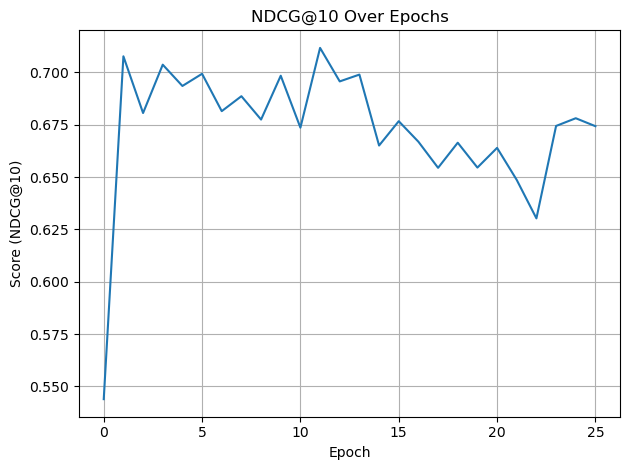

In [4]:
ndcg_results = [result[0] for result in evaluation_results]
plt.plot(ndcg_results)
plt.xlabel("Epoch")
plt.ylabel("Score (NDCG@10)")
plt.title("NDCG@10 Over Epochs")
plt.tight_layout()
plt.grid()
plt.show();

In [5]:
PREPROCESSED_PATH = "/home/gort/Projects/coffee-rating/data/processed/preprocessed_data.csv"
train_data_path = "/home/gort/Projects/coffee-rating/data/processed/training_data.jsonl"
MODEL_PATH = "/home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_11_3.pth"
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# vocabs = torch.load(MODEL_PATH, map_location=DEVICE)["vocabs"]
model, vocabs = load_model_inference(MODEL_PATH, numerical_dim=10, device=DEVICE)
df = pd.read_csv(PREPROCESSED_PATH)
df["combined_text"] = df["blind assessment"].fillna("") + " " + df["bottom line"].fillna("")

search_index = build_search_index(model, df, vocabs, device=DEVICE)



/home/gort/Projects/coffee-rating/src/models/evaluate.py:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(model_path, map_location=device)


Model loaded from /home/gort/Projects/coffee-rating/data/outputs/model-weights/8-11/coffee_model_epoch_11_3.pth and set to evaluation mode.
Building search index for all coffees...


Encoding all coffees: 100%|██████████| 2816/2816 [00:30<00:00, 92.06it/s] 

FAISS index built with 2816 vectors.


In [19]:
example_query = "Ethereal, experimental, and complex coffee with a unique flavor profile. The roast level is light, and the process is natural. The coffee comes from Ethiopia and has a floral aroma with hints of citrus and berries."

print(f"Recommendations for query: {example_query}")

recommendations = get_recommendations(example_query, model, search_index, df, top_k=10)

display_cols = ['url', 'company', 'coffee name', 'roast level', 'process', 'test_method', 'countries_extracted', "flavor_profile", "blind assessment", 'bottom line']

recommendations_df = pd.DataFrame(recommendations, columns=display_cols)
recommendations_df = recommendations_df[display_cols]
recommendations_df["rank"] = np.arange(1, len(recommendations_df) + 1)
recommendations_df.to_csv(f"recommendations_for_example.csv", index=False)

Recommendations for query: Ethereal, experimental, and complex coffee with a unique flavor profile. The roast level is light, and the process is natural. The coffee comes from Ethiopia and has a floral aroma with hints of citrus and berries.


In [11]:
%%html
<style>
.dataframe td {
    white-space: nowrap;
}
</style>